# Project 1
*Supervised Learning - AY 2021-2022 - November 17th 2021*

The goal of this project is to analyse a dataset representing carseat seals for a company. We want to build a model which will be able to predict the company carseat sales movements for the company’s store locations. The provided dataset includes the following information:
* Sales: unit sales at each store location (target feature)
* CompPrice: price charged by the nearest competitor at each location
* Income: community income level
* Advertising: local advertising budget for the company at each location 
* Population: population size in the region (in thousands)
* Price: price charged for a car seat at each site
* ShelveLoc: quality of shelving location at site (Good | Bad | Medium) 
* Age: average age of the local population
* Education: education level at each location
* Urban: whether the store is in an urban or rural location
* USA: whether the store is in the US or not

In order to build the desired predictive model, develop the following tasks and answer the following questions.

## (1.) Load and explore the dataset


In [105]:
## dataset exploration
import pandas as pd
data = pd.read_csv('carseats.csv')


In [106]:
# y = data.Sales
# print(y)

In [107]:
# X = data.drop(['Sales'], axis=1)
# print(X)

In [108]:
# X.head()

In [109]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
data.shape

(400, 11)

In [111]:
display(data)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120.0,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83.0,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80.0,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97.0,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128.0,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128.0,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120.0,NaN,55,11,No,Yes
397,7.41,162,26,12,368,159.0,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95.0,Bad,50,12,Yes,Yes


#### (1.a) How many numerical features are there? How many categorical features? 

There are 8 numerical features and 3 categorical ones.

#### (1.b) Verify if the dataset presents missing values and handle them

In [112]:
## check the presence and eventually handle missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        397 non-null    float64
 6   ShelveLoc    398 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 34.5+ KB


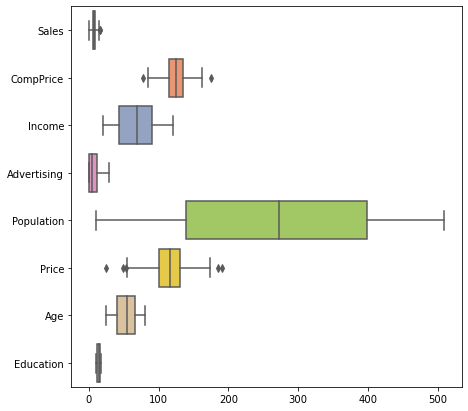

In [113]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(data=data, orient='h', palette='Set2')

In [114]:
data['ShelveLoc'].fillna(data['ShelveLoc'].value_counts().idxmax(), inplace=True)

In [115]:
data = data.fillna(data.mean())

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    float64
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 34.5+ KB


#### (1.c) Justify the choises you make for handling the missing values

There are 5 Nan values in this dataset, looking at the `data.info()` function. Since there are not many outliers, I replace them with the most frequent value in the categorical column, and with the mean for the numerical column.

## (2.) Data Engineering: prepare the dataset for a Linear Regression task

#### (2.a) Verify the features values distribution of the numerical variables.

Checking for the categorical columns, and encoding them:

In [117]:
## variables distribution visualization

display(data)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120.000000,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83.000000,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80.000000,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97.000000,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128.000000,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128.000000,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120.000000,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159.000000,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95.000000,Bad,50,12,Yes,Yes


In [118]:
data_numerical = data[['Sales', 'CompPrice', 'Income', 'Population', 'Price', 'Age', 'Education']]

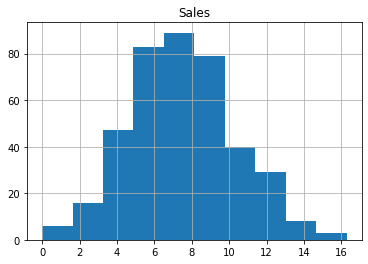

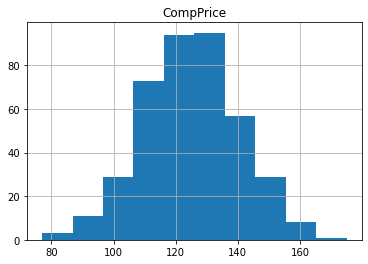

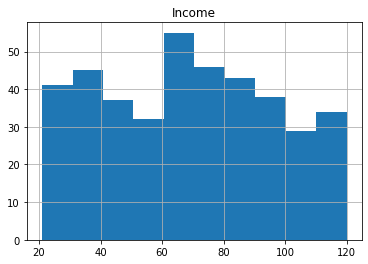

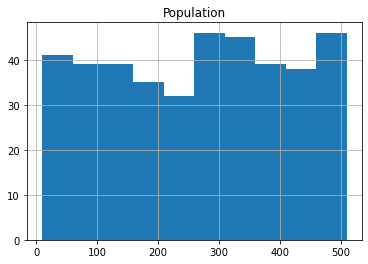

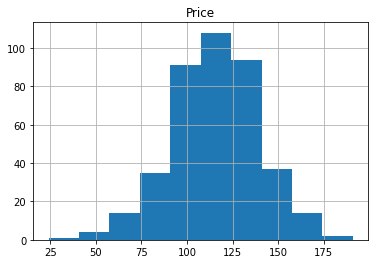

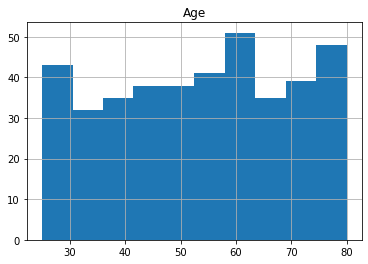

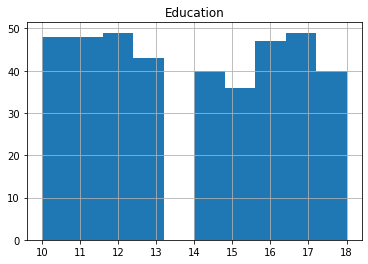

In [119]:
for column in data_numerical.columns:
    data_numerical.hist(column=column)

#### (2.b) Is features transformation necessary for the numerical variables? Let’s take into account we are preparing the dataset for a Linear Regression task, with the goal of building a "Sales" predictive model. If transformation is necessary, after justifying your choice, do proceed as described.


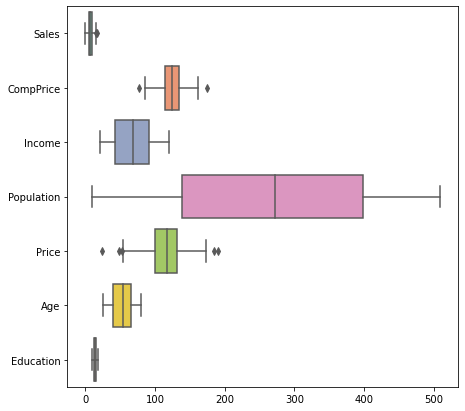

In [120]:
## if necessary, perform numerical variables transformation here
plt.figure(figsize=(7,7))
ax = sns.boxplot(data=data_numerical, orient='h', palette='Set2')

The dataset is not scaled, and since the `Sales` column seems to follow a normal distribution, I use the Robust scaler:

In [121]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(data_numerical.values)
scaled_data = transformer.transform(data_numerical.values)

In [122]:
data_scaled=pd.DataFrame(data=scaled_data, columns=data_numerical.columns)

#### (2.c) Verify the presence of outliers and eventually handle them. Justify your choices.

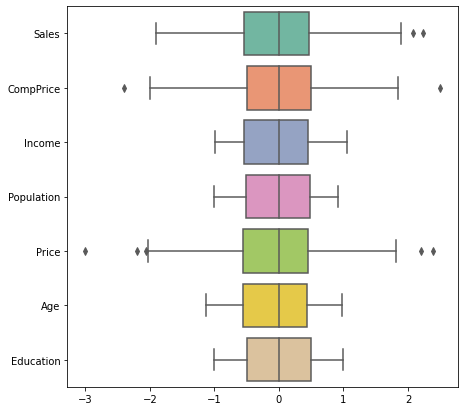

In [123]:
## Check the presence and eventually handle outliers
plt.figure(figsize=(7,7))
ax = sns.boxplot(data=data_scaled, orient='h', palette='Set2')

There are outliers, but not enough to justify a drop or a cap.

#### (2.d) Is encoding necessary for the categorical variables? If yes, which kind of encoding? Specify your choices, justify them and perform categorical data encoding, if necessary.

I use encoding with replace since one of the column contains ordinal values (`ShelveLoc`)

In [124]:
## perform cathegorical variables encoding here

In [125]:
dictionary_shelveloc={"ShelveLoc": {"Bad":0, "Medium":1, "Good":2}}
dictionary_urban={"Urban": {"No":0, "Yes":1}}
dictionary_us={"US": {"No":0, "Yes":1}}
data = data.replace(dictionary_shelveloc)
data = data.replace(dictionary_urban)
data = data.replace(dictionary_us)

display(data)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120.000000,0,42,17,1,1
1,11.22,111,48,16,260,83.000000,2,65,10,1,1
2,10.06,113,35,10,269,80.000000,1,59,12,1,1
3,7.40,117,100,4,466,97.000000,1,55,14,1,1
4,4.15,141,64,3,340,128.000000,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128.000000,2,33,14,1,1
396,6.14,139,23,3,37,120.000000,1,55,11,0,1
397,7.41,162,26,12,368,159.000000,1,40,18,1,1
398,5.94,100,79,7,284,95.000000,0,50,12,1,1


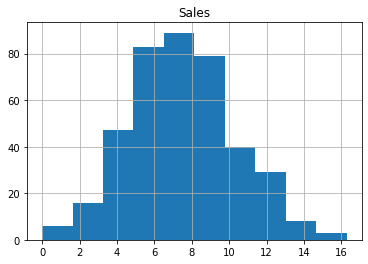

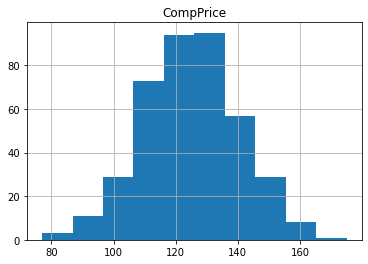

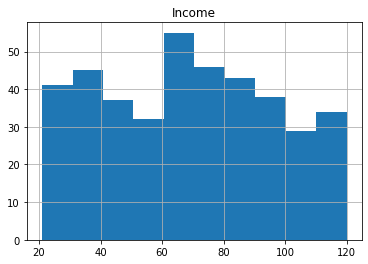

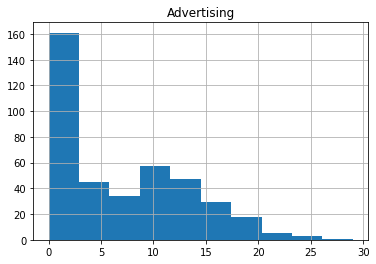

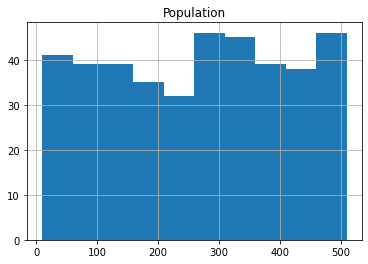

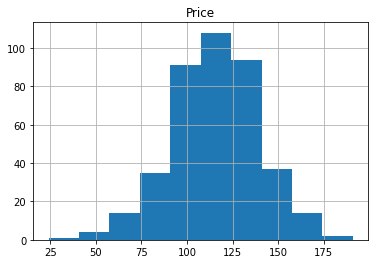

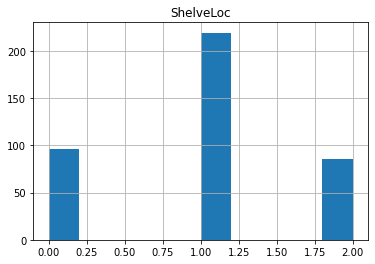

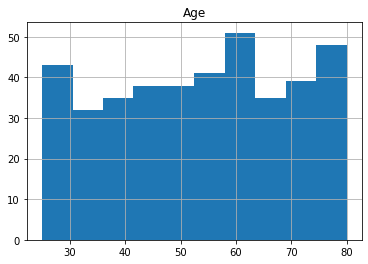

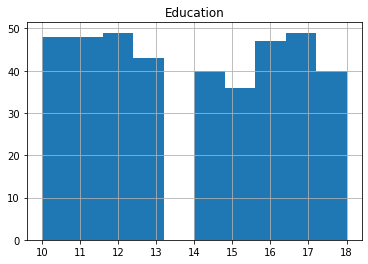

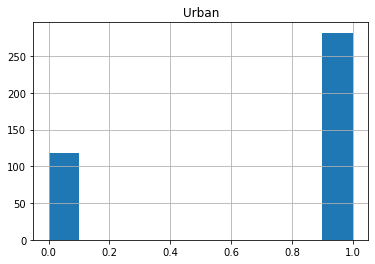

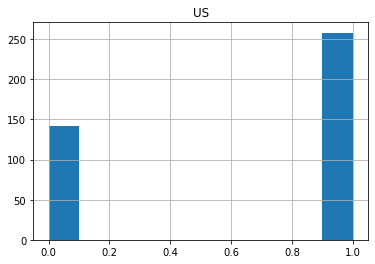

In [126]:
for column in data.columns:
    data.hist(column=column)

In [127]:
# scaling also dataset with categorical columns
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(data.values)
data = transformer.transform(data.values)

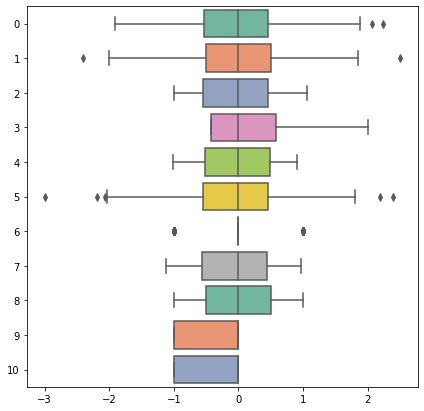

In [128]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(data=data, orient='h', palette='Set2')

#### (2.e) Increase the dimentionality of the dataset introducing Polynomial Features – degree = 3 (continuous variables)

In [129]:
## include polinomials degree = 3
x = data

In [130]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False) 
poly.fit(x)
X_poly = poly.transform(x)

In [131]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (400, 363)


In [132]:
# Let’s compare the entries of X_poly to those of x
print("Entries of x:\n{}".format(x[:5])) 
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of x:
[[ 0.51145038  0.65        0.08290155  0.5         0.01541426  0.09677419
  -1.         -0.47619048  0.75        0.          0.        ]
 [ 0.94910941 -0.7        -0.43523316  0.91666667 -0.04624277 -1.09677419
   1.          0.4        -1.          0.          0.        ]
 [ 0.65394402 -0.6        -0.70466321  0.41666667 -0.01156069 -1.19354839
   0.          0.17142857 -0.5         0.          0.        ]
 [-0.02290076 -0.4         0.64248705 -0.08333333  0.74759152 -0.64516129
   0.          0.01904762  0.          0.          0.        ]
 [-0.84987277  0.8        -0.10362694 -0.16666667  0.26204239  0.35483871
  -1.         -0.62857143 -0.25        0.         -1.        ]]
Entries of X_poly:
[[ 0.51145038  0.65        0.08290155 ...  0.          0.
   0.        ]
 [ 0.94910941 -0.7        -0.43523316 ...  0.          0.
   0.        ]
 [ 0.65394402 -0.6        -0.70466321 ...  0.          0.
   0.        ]
 [-0.02290076 -0.4         0.64248705 ...  0.          0.
   0

## (3.) Features Selection

#### (3.a) Perform Automatic Features Selection and visualize the Features which have been selected. Select one appropriate methodology for features selection and justify your choice.



I will use Univariate Feature selection

In [133]:
y = data[:,0]

In [134]:
X = data[:,1:]

In [135]:
from sklearn.feature_selection import SelectPercentile 
from sklearn.model_selection import train_test_split

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X, y, random_state=0, test_size=.5)

In [154]:
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50) 
select.fit(X_train_fs, y_train_fs)

# transform train set
X_train_selected = select.transform(X_train_fs)
X_test_selected = select.transform(X_test_fs)
print("X_train.shape: {}".format(X_train_fs.shape)) 
print("X_test.shape: {}".format(X_test_fs.shape)) 
print("X_train_selected.shape: {}".format(X_train_selected.shape))
print("X_test_selected.shape: {}".format(X_test_selected.shape))

X_train.shape: (200, 10)
X_test.shape: (200, 10)
X_train_selected.shape: (200, 5)
X_test_selected.shape: (200, 5)


[False False  True  True False  True  True False  True False]


([], [])

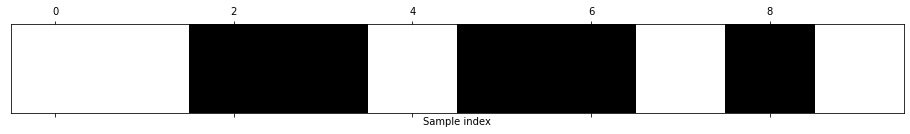

In [155]:
mask = select.get_support()

print(mask)

# visualize the mask -- black is True, white is False 
plt.matshow(mask.reshape(1, -1), cmap='gray_r') 
plt.xlabel("Sample index")
plt.yticks(())

#### Selecting the k best

In [138]:
from sklearn.feature_selection import SelectKBest, f_classif

# select the k best features based on ANOVA F-value between label/feature (classification tasks)
# ANOVA F-value tells us if the tuple of variables (label-feature) are jointly significant.
k_best = SelectKBest(score_func=f_classif, k='all') #Select features according to the k highest scores

fit = k_best.fit(X_train_fs, y_train_fs)

# transform training set
X_train_selected = k_best.transform(X_train_fs)
X_test_selected = k_best.transform(X_test_fs)
print("X_train.shape: {}".format(X_train_fs.shape)) 
print("X_test.shape: {}".format(X_test_fs.shape)) 
print("X_train_selected.shape: {}".format(X_train_selected.shape))
print("X_test_selected.shape: {}".format(X_test_selected.shape))

scores = []
for i in range(len(k_best.scores_)):
    scores.append(k_best.scores_[i])
#     print('Feature %d: %f' % (i, k_best.scores_[i]))
    
k_best.scores_.sort()
k_best.scores_ = k_best.scores_[:-11:-1]
print(k_best.scores_)

X_train.shape: (200, 10)
X_test.shape: (200, 10)
X_train_selected.shape: (200, 10)
X_test_selected.shape: (200, 10)
[1.64314116 1.3122983  1.23453552 1.22927928 1.04800173 0.97182433
 0.8310786  0.72441681 0.66335409 0.66307564]


[ True  True  True  True  True  True  True  True  True  True]


([], [])

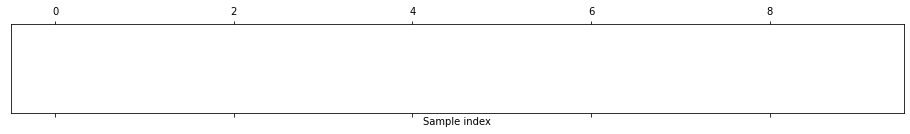

In [139]:
mask = k_best.get_support()
print(mask)
# visualize the mask -- black is True, white is False 
plt.matshow(mask.reshape(1, -1), cmap='gray_r') 
plt.xlabel("Sample index")
plt.yticks(())

## (4.) Linear Regression

#### (4.a) *(OPTIONAL)* Train a Multiple Linear Regression model, using the Sklearn implementation of Linear Regression to find the best θ vector. Use all the transformed features, excluding the derived polynomial features. Evaluate the model. Justify your choices with respect to the evaluation metrics exploited and discuss the obtained performances values.

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [141]:
## Train a Multiple Linear Regression Model and evaluate it
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
model = lin_reg.fit(X_train, y_train)

In [142]:
model.score(X_test, y_test)

0.8095665310413585

In [143]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_train, y_train, rcond=1e-6)
theta_best_svd

array([ 0.48841429,  0.18221802,  0.31221385,  0.02037237, -0.7758385 ,
        0.61964519, -0.28790818, -0.04397413,  0.05990654,  0.05668722])

the model does not perform very well.

#### (4.b) Use all the transformed features,excluding the derived polynomial features,to identify the best values of $\boldsymbol{\theta}$ by means of a Batch Gradient Descent Procedure. Identify the best values of $\eta$ (starting with an initial value of $\eta = 0.1$ ) and a fixed number of iterations $= 1000$. Evaluate the model. Justify your choices with respect to the evaluation metrics exploited. Discuss the obtained performances values.

In [144]:
X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]

eta = 0.001
test RMSE=2.7927508065439786
test R2=-15.498183660786573
train RMSE=2.790791713217831
train R2=-13.790668975636448

eta = 0.1
test RMSE=0.3501724147189579
test R2=0.7406205147128959
train RMSE=0.2878838869298379
train R2=0.8426134253711242

eta = 0.2
test RMSE=0.2957594381456245
test R2=0.8149670865075999
train RMSE=0.2577271489909828
train R2=0.8738598604762209

eta = 0.5
test RMSE=0.30045774578327983
test R2=0.8090416861230187
train RMSE=0.2564157046895818
train R2=0.8751403222621784

eta = 1
test RMSE=0.3000422242534714
test R2=0.8095694969363254
train RMSE=0.2564300636668138
train R2=0.8751263378810662


Best score r2 on test: 0.8149671
With parameter: 0.2


Text(0.5, 0, 'eta')

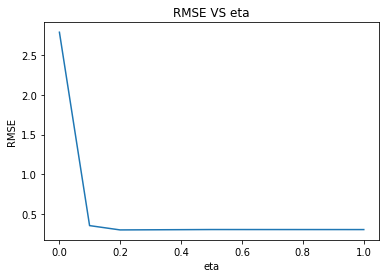

In [145]:
## Train a Multiple Linear Regression Model and evaluate it
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

eta_values = [0.001, 0.1, 0.2, 0.5, 1] # learning rate 
n_iterations = 100 

r2_scores = []
rmse_scores = []
best_score = 0
best_parameter = 100000

for eta in eta_values:
    print("eta = {}".format(eta))
    theta = np.random.randn(X.shape[1]+1,1)  # coefficients random initialization
    for iteration in range(n_iterations):
        gradients = (2/X.shape[0]) * X_b_train.T.dot(X_b_train.dot(theta) - y_train.reshape(-1,1)) 
        theta = theta - eta * gradients
    X_b_test = np.c_[np.ones((len(X_test), 1)), X_test] # add x0 = 1 to each instance 
    y_predict = X_b_test.dot(theta)

    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_predict)))
    r2_scores.append(r2_score(y_test, y_predict))

    print("test RMSE={}".format(np.sqrt(mean_squared_error(y_test, y_predict))))
    print("test R2={}".format(r2_score(y_test, y_predict))) 
    print("train RMSE={}".format(np.sqrt(mean_squared_error(y_train, X_b_train.dot(theta)))))
    print("train R2={}\n".format(r2_score(y_train, X_b_train.dot(theta))))


for idx, value in enumerate(r2_scores):
    new_score = value
    if new_score > best_score:
        best_score = new_score
        best_parameter = eta_values[idx]
print("\nBest score r2 on test: {:.7f}".format(best_score))
print("With parameter: {}".format(best_parameter))

plt.plot(eta_values,rmse_scores)
plt.title("RMSE VS eta")
plt.ylabel("RMSE")
plt.xlabel("eta")

Trying to get better with GridSearch does not go very far.

#### (4.c) Use the complete set of features, including the derived polynomial features. Train a Multiple Linear Regression model, using the Sklearn implementation of Linear Regression to find the best $\boldsymbol{\theta}$ vector. Evaluate the model.

In [146]:
## Train a Multiple Linear Regression Model and evaluate it
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)

In [147]:
model = lin_reg.fit(X_train, y_train)

In [148]:
model.score(X_test, y_test)

0.9978217533206554

In [149]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_train, y_train, rcond=1e-6)
# theta_best_svd

#### (4.d) Use the complete set of features, including the derived polynomial features. Train a Ridge Regression model identifying the best value of $\alpha$ that allows the model to achieve the best generalization performances.

In [150]:
## Train a Multiple Linear Regression Model and evaluate it
from sklearn.linear_model import Ridge

best_alpha = 0
best_score = 0

for alpha in [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1]:
    ridge_reg = Ridge(alpha=alpha)
    reg_model = ridge_reg.fit(X_train, y_train)
    new_score = reg_model.score(X_test, y_test)
    
    if new_score > best_score:
        best_score = new_score
        best_alpha = alpha
        
print('Best value of alpha: {}'.format(best_alpha))
print('Best score for this aplha: {}'.format(best_score))

Best value of alpha: 0.001
Best score for this aplha: 0.9978510395043383


#### (4.e) (*OPTIONAL*) Use the subset of features selected in the Feature Selection task set. Train a Multiple Linear Regression model using the Sklearn implementation of Linear Regression to find the best $\boldsymbol{\theta}$ vector. Evaluate the model and compare the results with the approach exploited in the previous task.

In [151]:
## Train a Multiple Linear Regression Model with the selected features and evaluate it
model = lin_reg.fit(X_train_selected, y_train_fs)

In [152]:
model.score(X_test_selected, y_test_fs)

0.8333406100698315

In [153]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_train_selected, y_train_fs, rcond=1e-6)
theta_best_svd

array([ 0.50572488,  0.1842164 ,  0.29274632,  0.02630168, -0.80712487,
        0.60278493, -0.30701059, -0.0445284 ,  0.0387812 ,  0.05494815])

DISCLAIMER: I don't really know if the feature selection part is correct.\
If it is correct, I can see that compared to the normal linear regression score, this with the selected features is a bit better, not by much though, just a couple of decimals.

#### (4.f) Compare and discuss the results obtained above.

I see that the score for the linear regression is not too high, instead if I compare the score for the linear regression using the polynomial features I see that it really is near 1. Comparing the normal linear regression with the ridge regression, the scores are practically the same.